# Import library

In [2]:
# import library
import pandas as pd
import numpy as np
import datetime as dt

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [3]:
pip install chart-studio

Note: you may need to restart the kernel to use updated packages.


In [4]:
from chart_studio import plotly

In [5]:
import plotly

import plotly as py
import plotly.graph_objs as go

from plotly.offline import download_plotlyjs, init_notebook_mode, iplot 

# jupyter setting
init_notebook_mode(connected = True)

## import dataset

## disini kita import dataset yang diperlukan dan load dataset tersebut

In [6]:
# Import the dataset
online = pd.read_excel('Downloads/Online Retail.xlsx')

In [7]:
online

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


## check missing value

In [8]:
# mendetek nilai yang kosong dari dataset
print(online.isnull().values.sum())

136534


In [9]:
# mengganti space/value null dengan nan
online = online.replace(" ",np.NaN)

## pada kali ini dilakukan dengan drop data yang kososng, jika ingin mengganti nilai yang kosong dapat menggunakan beberapa cara salah satunya adalah dengan imputasi atau mengisi nilai dari pola data yang lengkap tersebut, sehingga data yang didapatkan menjadi lengkap dengan code berikut:
online = online.fillna(online.mean())

### penjelasan code
fillna = untuk mengisi nilai yang NaN atau kosong


(online.mean()) = mengisi nilai dengan mean, jika ingin diganti bisa dengan min/max tapi yang disarankan adalah mean dengan menggunakan logika imputasi

### drop row yang memiliki customer id yang kosong

In [10]:
# drop the row missing customerID
online = online[online.CustomerID.notnull()]

In [11]:
# menghitung jumlah nan yang kosong setelah di drop
print(online.isnull().values.sum())

0


## pembuatan time cohort

### mengambil 30% sumber dataset, jika ingin di ganti parameter pengambilan data bisa diubah dari parameter frac

In [12]:
# use a subset of full data
np.random.seed(306)
online = online.sample(frac = .3).reset_index(drop = True)
online.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,542401,22502,PICNIC BASKET WICKER SMALL,2,2011-01-27 15:51:00,5.95,14541.0,United Kingdom
1,542231,22726,ALARM CLOCK BAKELIKE GREEN,2,2011-01-26 13:40:00,3.75,16714.0,United Kingdom
2,556956,22090,PAPER BUNTING RETROSPOT,40,2011-06-16 09:04:00,2.55,13694.0,United Kingdom
3,573874,23581,JUMBO BAG PAISLEY PARK,10,2011-11-01 12:45:00,2.08,13868.0,United Kingdom
4,580742,23343,JUMBO BAG VINTAGE CHRISTMAS,200,2011-12-06 09:30:00,1.75,13694.0,United Kingdom


In [13]:
#cek total seluruh data
online

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,542401,22502,PICNIC BASKET WICKER SMALL,2,2011-01-27 15:51:00,5.95,14541.0,United Kingdom
1,542231,22726,ALARM CLOCK BAKELIKE GREEN,2,2011-01-26 13:40:00,3.75,16714.0,United Kingdom
2,556956,22090,PAPER BUNTING RETROSPOT,40,2011-06-16 09:04:00,2.55,13694.0,United Kingdom
3,573874,23581,JUMBO BAG PAISLEY PARK,10,2011-11-01 12:45:00,2.08,13868.0,United Kingdom
4,580742,23343,JUMBO BAG VINTAGE CHRISTMAS,200,2011-12-06 09:30:00,1.75,13694.0,United Kingdom
...,...,...,...,...,...,...,...,...
122044,545979,21724,PANDA AND BUNNIES STICKER SHEET,2,2011-03-08 12:30:00,0.85,12748.0,United Kingdom
122045,546774,22529,MAGIC DRAWING SLATE GO TO THE FAIR,2,2011-03-16 15:45:00,0.42,14505.0,United Kingdom
122046,569521,22749,FELTCRAFT PRINCESS CHARLOTTE DOLL,1,2011-10-04 14:33:00,3.75,16474.0,United Kingdom
122047,569683,22577,WOODEN HEART CHRISTMAS SCANDINAVIAN,12,2011-10-05 14:39:00,0.29,15953.0,United Kingdom


## dari data frame diatas menunjukan proses yang dilakukan dengan drop dan mengambil hanya 30% dari data

In [14]:
## pembuatan cohort berdasarkan tahun, bulan dan hari

In [15]:
#extract year and month
def get_month(x): return dt.datetime(x.year, x.month, 1) #mendapatkan nilai datetime tahun, bulan dan hari
online['InvoiceMonth'] = online['InvoiceDate'].apply(get_month)
grouping = online.groupby('CustomerID')['InvoiceMonth'] # groupby antara customerid dan invoice month
online['CohortMonth'] = grouping.transform('min') # dengan grouping nilai minimum
online.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,CohortMonth
0,542401,22502,PICNIC BASKET WICKER SMALL,2,2011-01-27 15:51:00,5.95,14541.0,United Kingdom,2011-01-01,2011-01-01
1,542231,22726,ALARM CLOCK BAKELIKE GREEN,2,2011-01-26 13:40:00,3.75,16714.0,United Kingdom,2011-01-01,2011-01-01
2,556956,22090,PAPER BUNTING RETROSPOT,40,2011-06-16 09:04:00,2.55,13694.0,United Kingdom,2011-06-01,2010-12-01
3,573874,23581,JUMBO BAG PAISLEY PARK,10,2011-11-01 12:45:00,2.08,13868.0,United Kingdom,2011-11-01,2011-11-01
4,580742,23343,JUMBO BAG VINTAGE CHRISTMAS,200,2011-12-06 09:30:00,1.75,13694.0,United Kingdom,2011-12-01,2010-12-01
5,539468,21793,CLASSIC FRENCH STYLE BASKET BROWN,1,2010-12-19 13:31:00,6.75,15044.0,United Kingdom,2010-12-01,2010-12-01
6,574710,21874,GIN AND TONIC MUG,6,2011-11-06 14:17:00,1.65,15427.0,United Kingdom,2011-11-01,2011-10-01
7,552864,23254,CHILDRENS CUTLERY DOLLY GIRL,6,2011-05-11 17:13:00,4.15,13235.0,United Kingdom,2011-05-01,2011-05-01
8,570797,22332,SKULLS PARTY BAG + STICKER SET,2,2011-10-12 12:24:00,1.65,15311.0,United Kingdom,2011-10-01,2010-12-01
9,578950,22663,JUMBO BAG DOLLY GIRL DESIGN,1,2011-11-27 14:40:00,2.08,17885.0,United Kingdom,2011-11-01,2011-11-01


In [16]:
def get_date_int(df, column):
    year = df[column].dt.year
    month = df[column].dt.month
    day = df[column].dt.day
    return year, month, day

CohortMonth to the index parameter, CohortIndex to the columns parameter, customer_id to the values parameter.

In [17]:
# Getting the integers for date parts from the `InvoiceDay` column
invoice_year, invoice_month, _ = get_date_int(online, 'InvoiceMonth')
# Getting the integers for date parts from the `CohortDay` column
cohort_year, cohort_month, _ = get_date_int(online, 'CohortMonth')
#  Get the  difference in years
years_diff = invoice_year - cohort_year
# Calculate difference in months
months_diff = invoice_month - cohort_month
""" Extract the difference in months from all previous values
 "+1" in addeded at the end so that first month is marked as 1 instead of 0 for easier interpretation. 
 """
online['CohortIndex'] = years_diff * 12 + months_diff + 1 #cohort index adalah perbedaan tahun dikali 12 ditambah perbedaan bulan ditambah 1
online.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,CohortMonth,CohortIndex
0,542401,22502,PICNIC BASKET WICKER SMALL,2,2011-01-27 15:51:00,5.95,14541.0,United Kingdom,2011-01-01,2011-01-01,1
1,542231,22726,ALARM CLOCK BAKELIKE GREEN,2,2011-01-26 13:40:00,3.75,16714.0,United Kingdom,2011-01-01,2011-01-01,1
2,556956,22090,PAPER BUNTING RETROSPOT,40,2011-06-16 09:04:00,2.55,13694.0,United Kingdom,2011-06-01,2010-12-01,7
3,573874,23581,JUMBO BAG PAISLEY PARK,10,2011-11-01 12:45:00,2.08,13868.0,United Kingdom,2011-11-01,2011-11-01,1
4,580742,23343,JUMBO BAG VINTAGE CHRISTMAS,200,2011-12-06 09:30:00,1.75,13694.0,United Kingdom,2011-12-01,2010-12-01,13


In [18]:
# Counting daily active user from each chort
grouping = online.groupby(['CohortMonth', 'CohortIndex'])
# Counting number of unique customer Id's falling in each group of CohortMonth and CohortIndex
cohort_data = grouping['CustomerID'].apply(pd.Series.nunique)
cohort_data = cohort_data.reset_index()
 # Assigning column names to the dataframe created above
cohort_counts = cohort_data.pivot(index='CohortMonth',
                                  columns='CohortIndex',
                                  values='CustomerID')
cohort_data.head()

,CohortMonth,CohortIndex,CustomerID
0,2010-12-01,1,867
1,2010-12-01,2,309
2,2010-12-01,3,273
3,2010-12-01,4,322
4,2010-12-01,5,306


In [19]:
# menghitung cohort dari data yang telah diolah
cohort_counts

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonth,,,,,,,,,,,,,
2010-12-01,867.0,309.0,273.0,322.0,306.0,340.0,318.0,291.0,305.0,325.0,321.0,425.0,231.0
2011-01-01,411.0,92.0,110.0,97.0,132.0,119.0,99.0,99.0,123.0,134.0,150.0,59.0,NaN
2011-02-01,358.0,80.0,72.0,105.0,92.0,91.0,93.0,98.0,90.0,113.0,32.0,NaN,NaN
2011-03-01,434.0,72.0,102.0,84.0,102.0,77.0,108.0,101.0,120.0,39.0,NaN,NaN,NaN
2011-04-01,293.0,59.0,65.0,59.0,55.0,67.0,65.0,74.0,22.0,NaN,NaN,NaN,NaN
2011-05-01,266.0,52.0,47.0,44.0,54.0,60.0,67.0,27.0,NaN,NaN,NaN,NaN,NaN
2011-06-01,238.0,45.0,34.0,59.0,58.0,78.0,21.0,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,185.0,32.0,40.0,43.0,49.0,19.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,163.0,33.0,40.0,41.0,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## menghitung retention rate

In [20]:
cohort_sizes = cohort_counts.iloc[:,0]
retention = cohort_counts.divide(cohort_sizes, axis=0)
# Coverting the retention rate into percentage and Rounding off.
retention.round(3) * 100

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonth,,,,,,,,,,,,,
2010-12-01,100.0,35.6,31.5,37.1,35.3,39.2,36.7,33.6,35.2,37.5,37.0,49.0,26.6
2011-01-01,100.0,22.4,26.8,23.6,32.1,29.0,24.1,24.1,29.9,32.6,36.5,14.4,NaN
2011-02-01,100.0,22.3,20.1,29.3,25.7,25.4,26.0,27.4,25.1,31.6,8.9,NaN,NaN
2011-03-01,100.0,16.6,23.5,19.4,23.5,17.7,24.9,23.3,27.6,9.0,NaN,NaN,NaN
2011-04-01,100.0,20.1,22.2,20.1,18.8,22.9,22.2,25.3,7.5,NaN,NaN,NaN,NaN
2011-05-01,100.0,19.5,17.7,16.5,20.3,22.6,25.2,10.2,NaN,NaN,NaN,NaN,NaN
2011-06-01,100.0,18.9,14.3,24.8,24.4,32.8,8.8,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,100.0,17.3,21.6,23.2,26.5,10.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,100.0,20.2,24.5,25.2,12.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
grouping = online.groupby(['CohortMonth','CohortIndex'])
cohort_data = grouping['Quantity'].mean()
cohort_data = cohort_data.reset_index()
average_quantity = cohort_data.pivot(index='CohortMonth',
                                    columns='CohortIndex',
                                    values='Quantity')
average_quantity.round(1)

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonth,,,,,,,,,,,,,
2010-12-01,11.6,14.0,14.0,13.6,12.9,14.4,16.2,14.5,16.8,16.6,15.4,12.3,14.4
2011-01-01,9.8,13.3,15.7,12.6,13.4,14.4,14.2,16.3,11.5,10.5,8.9,10.4,NaN
2011-02-01,10.9,12.9,29.5,10.2,9.5,14.4,14.4,11.7,10.5,10.4,13.1,NaN,NaN
2011-03-01,10.3,14.7,13.7,10.3,15.3,15.9,13.4,12.6,9.9,7.1,NaN,NaN,NaN
2011-04-01,9.8,10.7,10.1,12.6,12.7,8.2,8.5,10.0,7.6,NaN,NaN,NaN,NaN
2011-05-01,10.3,10.7,13.5,11.8,10.7,8.4,9.2,7.0,NaN,NaN,NaN,NaN,NaN
2011-06-01,10.4,15.4,12.5,11.2,10.6,9.5,8.5,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,10.2,11.0,9.1,9.4,6.6,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,10.0,6.3,5.3,6.4,7.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## retention table

In [22]:
retention.round(3)*100

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonth,,,,,,,,,,,,,
2010-12-01,100.0,35.6,31.5,37.1,35.3,39.2,36.7,33.6,35.2,37.5,37.0,49.0,26.6
2011-01-01,100.0,22.4,26.8,23.6,32.1,29.0,24.1,24.1,29.9,32.6,36.5,14.4,NaN
2011-02-01,100.0,22.3,20.1,29.3,25.7,25.4,26.0,27.4,25.1,31.6,8.9,NaN,NaN
2011-03-01,100.0,16.6,23.5,19.4,23.5,17.7,24.9,23.3,27.6,9.0,NaN,NaN,NaN
2011-04-01,100.0,20.1,22.2,20.1,18.8,22.9,22.2,25.3,7.5,NaN,NaN,NaN,NaN
2011-05-01,100.0,19.5,17.7,16.5,20.3,22.6,25.2,10.2,NaN,NaN,NaN,NaN,NaN
2011-06-01,100.0,18.9,14.3,24.8,24.4,32.8,8.8,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,100.0,17.3,21.6,23.2,26.5,10.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,100.0,20.2,24.5,25.2,12.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## heatmap

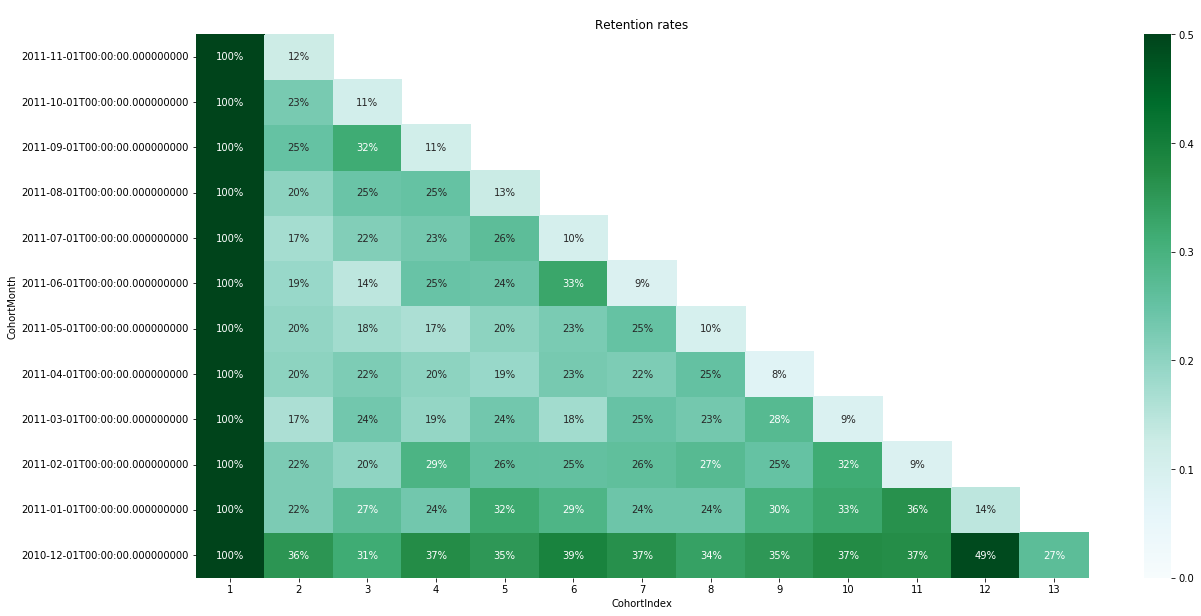

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure (figsize=(20, 10))

plt.title ('Retention rates')

sns.heatmap( data = retention,
           annot = True,
           fmt='.0%',
           vmin = 0.0,
           vmax = 0.5,
           cmap = 'BuGn')
axes = plt.gca()
axes.set_ylim([0,12])
plt.show()

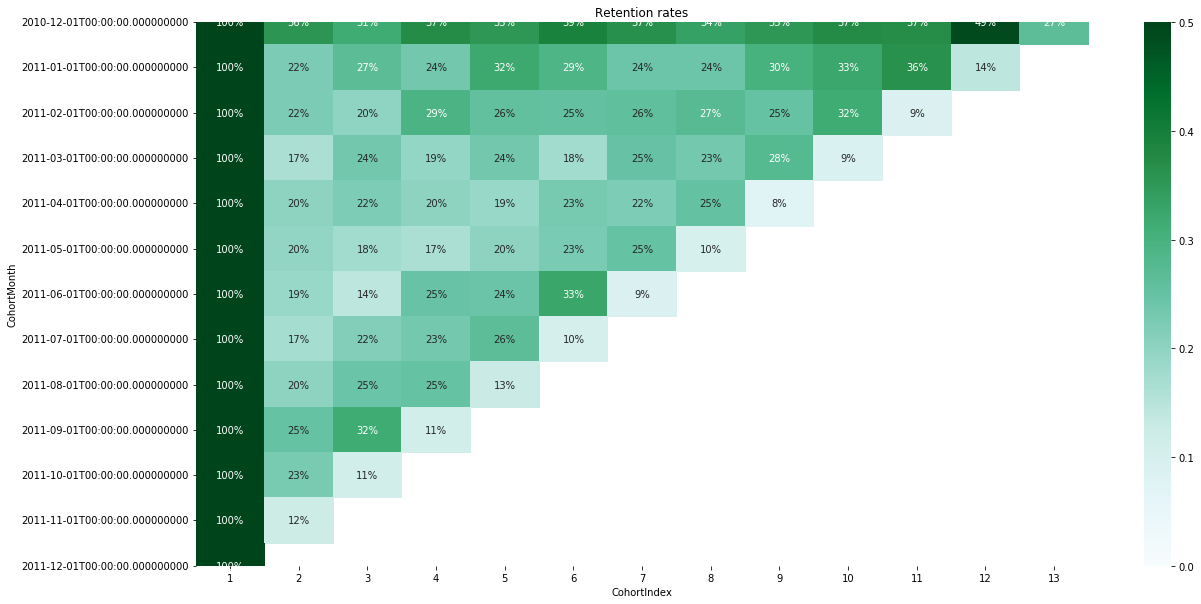

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure (figsize=(20, 10))

plt.title ('Retention rates')

sns.heatmap( data = retention,
           annot = True,
           fmt='.0%',
           vmin = 0.0,
           vmax = 0.5,
           cmap = 'BuGn')
plt.show()

In [25]:
#extract year and month and day
def get_day(x): return dt.datetime(x.year, x.month, x.day) #mendapatkan nilai datetime tahun, bulan dan hari
online['InvoiceMonth'] = online['InvoiceDate'].apply(get_day)
grouping = online.groupby('CustomerID')['InvoiceMonth'] # groupby antara customerid dan invoice month
online['CohortDay'] = grouping.transform('min') # dengan grouping nilai minimum
online.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,CohortMonth,CohortIndex,CohortDay
0,542401,22502,PICNIC BASKET WICKER SMALL,2,2011-01-27 15:51:00,5.95,14541.0,United Kingdom,2011-01-27,2011-01-01,1,2011-01-24
1,542231,22726,ALARM CLOCK BAKELIKE GREEN,2,2011-01-26 13:40:00,3.75,16714.0,United Kingdom,2011-01-26,2011-01-01,1,2011-01-26
2,556956,22090,PAPER BUNTING RETROSPOT,40,2011-06-16 09:04:00,2.55,13694.0,United Kingdom,2011-06-16,2010-12-01,7,2010-12-01
3,573874,23581,JUMBO BAG PAISLEY PARK,10,2011-11-01 12:45:00,2.08,13868.0,United Kingdom,2011-11-01,2011-11-01,1,2011-11-01
4,580742,23343,JUMBO BAG VINTAGE CHRISTMAS,200,2011-12-06 09:30:00,1.75,13694.0,United Kingdom,2011-12-06,2010-12-01,13,2010-12-01
5,539468,21793,CLASSIC FRENCH STYLE BASKET BROWN,1,2010-12-19 13:31:00,6.75,15044.0,United Kingdom,2010-12-19,2010-12-01,1,2010-12-12
6,574710,21874,GIN AND TONIC MUG,6,2011-11-06 14:17:00,1.65,15427.0,United Kingdom,2011-11-06,2011-10-01,2,2011-10-23
7,552864,23254,CHILDRENS CUTLERY DOLLY GIRL,6,2011-05-11 17:13:00,4.15,13235.0,United Kingdom,2011-05-11,2011-05-01,1,2011-05-11
8,570797,22332,SKULLS PARTY BAG + STICKER SET,2,2011-10-12 12:24:00,1.65,15311.0,United Kingdom,2011-10-12,2010-12-01,11,2010-12-01
9,578950,22663,JUMBO BAG DOLLY GIRL DESIGN,1,2011-11-27 14:40:00,2.08,17885.0,United Kingdom,2011-11-27,2011-11-01,1,2011-11-27
